<a href="https://colab.research.google.com/github/ycchiu18/xiemen1129/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [10]:
trans = [
  "airplane",										
  "automobile",										
  "bird",										
  "cat",										
  "deer",										
  "dog",										
  "frog",										
  "horse",										
  "ship",										
  "truck"
]

airplane


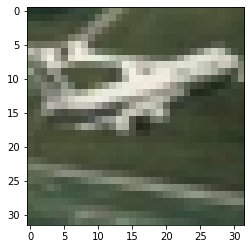

In [18]:
idx = 10050
import matplotlib.pyplot as plt
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3) * 64 + 64(bias)
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64) * 128 + 128(bias)
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 256)       

In [37]:
# Sparse: 只存不是0的地方->不用做one-hot encoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [38]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
450/450 - 18s - loss: 1.4557 - accuracy: 0.4730 - val_loss: 1.0702 - val_accuracy: 0.6318 - 18s/epoch - 39ms/step
Epoch 2/100
450/450 - 8s - loss: 0.9941 - accuracy: 0.6513 - val_loss: 0.8996 - val_accuracy: 0.6868 - 8s/epoch - 18ms/step
Epoch 3/100
450/450 - 8s - loss: 0.8032 - accuracy: 0.7204 - val_loss: 0.7903 - val_accuracy: 0.7348 - 8s/epoch - 18ms/step
Epoch 4/100
450/450 - 8s - loss: 0.6704 - accuracy: 0.7675 - val_loss: 0.7432 - val_accuracy: 0.7488 - 8s/epoch - 18ms/step
Epoch 5/100
450/450 - 8s - loss: 0.5664 - accuracy: 0.8025 - val_loss: 0.7186 - val_accuracy: 0.7580 - 8s/epoch - 18ms/step
Epoch 6/100
450/450 - 8s - loss: 0.4632 - accuracy: 0.8395 - val_loss: 0.7154 - val_accuracy: 0.7714 - 8s/epoch - 18ms/step
Epoch 7/100
450/450 - 8s - loss: 0.3744 - accuracy: 0.8704 - val_loss: 0.7289 - val_accuracy: 0.7782 - 8s/epoch - 18ms/step
Epoch 8/100
450/450 - 8s - loss: 0.2865 - accuracy: 0.9018 - val_loss: 0.7809 - val_accuracy: 0.7732 - 8s/epoch - 18ms/step
Epoch 

In [42]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.7562 - accuracy: 0.7514


[0.7561678886413574, 0.7513999938964844]

In [43]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

array([3, 8, 8, ..., 5, 4, 7])

In [44]:
# the same: y_test.reshape(-1)
y_test_reshape = y_test.reshape(10000)
y_test_reshape

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [45]:
# tensorflow: one-hot sklearn: original
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(True)".format(trans[i]) for i in range(10)],
      columns=["{}(Pred)".format(trans[i]) for i in range(10)])

,airplane(Pred),automobile(Pred),bird(Pred),cat(Pred),deer(Pred),dog(Pred),frog(Pred),horse(Pred),ship(Pred),truck(Pred)
airplane(True),799,15,50,15,19,6,11,6,48,31
automobile(True),12,818,12,6,3,2,5,2,13,127
bird(True),46,6,703,49,55,44,52,26,13,6
cat(True),16,4,102,563,66,135,64,25,7,18
deer(True),17,4,75,44,731,33,42,44,9,1
dog(True),4,2,61,165,53,630,26,44,4,11
frog(True),5,4,60,59,30,15,817,3,3,4
horse(True),19,4,53,38,64,41,6,763,2,10
ship(True),59,25,16,14,7,5,7,2,824,41
truck(True),29,39,14,14,3,9,4,10,12,866


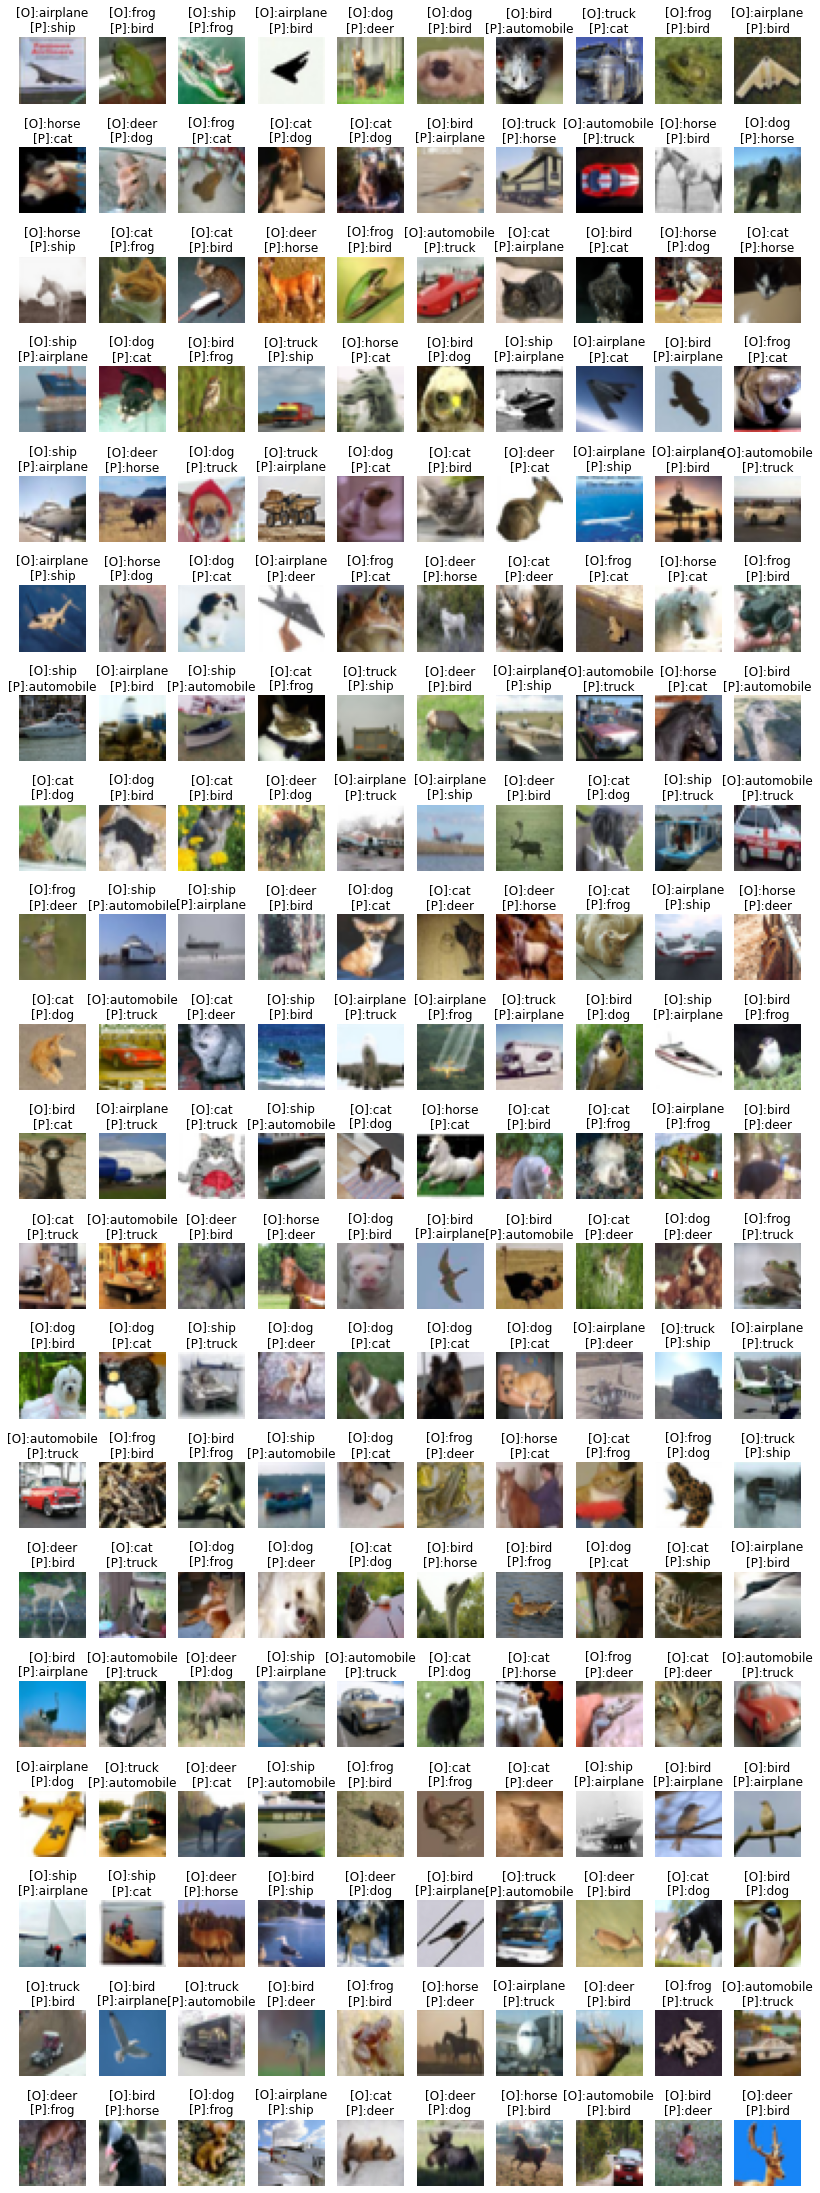

In [46]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.nonzero(y_test_reshape != pre)[0]
idx = idx[:200]
pre_false_label = y_test_reshape[idx]
pre_false_pre = pre[idx]
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

In [49]:
import requests
import numpy as np
from PIL import Image
url = input("url:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_pre = np.array(img).reshape(1, 32, 32, 3)
proba = model.predict(img_pre)[0] 
for i in range(10):
  print(trans[1], ":", round(proba[1], 5))
plt.imshow(img)

url:https://cdn.hk01.com/di/media/images/cis/5e5353995e00e37651d9506e.jpg/ZQz5kQZXgGklsCZfgFop0LRxiLN2tuoFSRt-nUkbfp0?v=w960


UnidentifiedImageError: ignored